# DCS 540 Data Preparation (DSC540-T301 2225-1)
## Bellevue University
## Project: Milestone 3
## Author: Jake Meyer
## Date: 05/04/2022

## Milestone 3: Website Data Cleaning
Website source listed below:

[Data Scientist Salary Data from Zippia](https://www.zippia.com/data-scientist-jobs/salary/#by-industry)

In [176]:
'''
Import the necessary libraries to transform and/or clean the website data from Zippia.
''' 
!pip install tabula-py xlrd lxml

!pip install openpyxl

import numpy as np

import pandas as pd
   
from bs4 import BeautifulSoup

import requests

import html5lib

import matplotlib.pyplot as plt

In [177]:
'''
Create a request to the zippia website and store as source.
Read the website content with BeautifulSoup().
'''
source = requests.get('https://www.zippia.com/data-scientist-jobs/salary').text
soup = BeautifulSoup(source, 'lxml')


In [178]:
'''
View the content of the webpage with soup.prettify().
prettify() will help provide an easier to read output for the content.
'''
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <base href="/"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="/ui-router/images/favicon.ico" rel="icon" type="image/x-icon"/>
  <link href="https://fonts.googleapis.com" rel="preconnect"/>
  <link href="https://fonts.gstatic.com" rel="preconnect"/>
  <link href="https://fonts.gstatic.com" rel="dns-prefetch"/>
  <link data-href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700|Roboto:300,400,500,700&amp;display=swap" rel="stylesheet"/>
  <link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
  <meta content="height=device-height,  width=device-width, initial-scale=1.0,  minimum-scale=1.0, maximum-scale=1.0,  user-scalable=no, target-densitydpi=device-dpi, viewport-fit=cover" name="viewport"/>
  <title>
   Data Scientist Salary (April 2022) - Zippia | Average Data Scientist Salaries Hourly And Annual
  </title>
  <meta content="The average salary for &lt;jo

In [179]:
'''
Find all of the tables on the site using the find_all('table') method.
Use len() to determine the number of tables.
'''
all_tables = soup.find_all('table')
print("There are {} tables in this file.".format(len(all_tables)))

There are 12 tables in this file.


In [5]:
'''
Index through the tables to find the right table for city and state data.
It appears the third table (index number 2) shows the city table.
'''
all_tables[2]

<table class="table_table__1SUby custom-table"><thead><tr class="table_headRow__3CMnb table-head-row"><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">City</th><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">Avg. Salary</th><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">Hourly Rate</th></tr></thead><tbody></tbody></table>

In [6]:
'''
Set a variable called city_table equivalent to the third table on the site.
'''
city_table = all_tables[2]

In [181]:
'''
Use type() to determine how the element is stored. 
As seen in the output below, the element is a tag stored in bs4.
'''
print(type(city_table))

<class 'bs4.element.Tag'>


In [182]:
'''
View the content of the table with prettify().
'''
print(city_table.prettify())

<table class="table_table__1SUby custom-table">
 <thead>
  <tr class="table_headRow__3CMnb table-head-row">
   <th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">
    City
   </th>
   <th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">
    Avg. Salary
   </th>
   <th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">
    Hourly Rate
   </th>
  </tr>
 </thead>
 <tbody>
 </tbody>
</table>


In [212]:
'''
The headers within the city table on zippia were successfully pulled, however the content within each of the <td> elements
kept returning as empty values. After multiple attempts of reading the content using beautiful soup,
the strategy outlined below finally worked. The full city_table element was copied over as a string 
from the zippia website. It was stored as a variable called string. Then, read_html() was used to pull the data from the table
and store as a list.
'''
string = '''
<table class="table_table__1SUby custom-table"><thead><tr class="table_headRow__3CMnb table-head-row"><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font table_selected__1rekk">City<a class="table_sort__3OGio d-inline-block text-center z-ml-4 sortyby"><img src="https://static.zippia.com/ui-router/images/top_sort_unselected.png" class="position-relative z-m-1 selected" alt="asc" width="8" height="5"></a></th><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">Avg. Salary<a class="table_sort__3OGio d-inline-block text-center z-ml-4 sortyby"><img src="https://static.zippia.com/ui-router/images/top_sort_unselected.png" class="position-relative z-m-1" alt="asc" width="8" height="5"><img src="https://static.zippia.com/ui-router/images/bottom_sort_unselected.png" class="position-relative z-m-1" alt="desc" width="8" height="5"></a></th><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">Hourly Rate<a class="table_sort__3OGio d-inline-block text-center z-ml-4 sortyby"><img src="https://static.zippia.com/ui-router/images/top_sort_unselected.png" class="position-relative z-m-1" alt="asc" width="8" height="5"><img src="https://static.zippia.com/ui-router/images/bottom_sort_unselected.png" class="position-relative z-m-1" alt="desc" width="8" height="5"></a></th></tr></thead><tbody><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Arlington, VA</td><td class="table_data__1f5rh table-data z-pl-20">$90,649</td><td class="table_data__1f5rh table-data z-pl-20">$43.58</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Austin, TX</td><td class="table_data__1f5rh table-data z-pl-20">$88,720</td><td class="table_data__1f5rh table-data z-pl-20">$42.65</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Bentonville, AR</td><td class="table_data__1f5rh table-data z-pl-20">$82,474</td><td class="table_data__1f5rh table-data z-pl-20">$39.65</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Boston, MA</td><td class="table_data__1f5rh table-data z-pl-20">$94,202</td><td class="table_data__1f5rh table-data z-pl-20">$45.29</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Chicago, IL</td><td class="table_data__1f5rh table-data z-pl-20">$86,137</td><td class="table_data__1f5rh table-data z-pl-20">$41.41</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Columbus, GA</td><td class="table_data__1f5rh table-data z-pl-20">$82,140</td><td class="table_data__1f5rh table-data z-pl-20">$39.49</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Columbus, OH</td><td class="table_data__1f5rh table-data z-pl-20">$86,664</td><td class="table_data__1f5rh table-data z-pl-20">$41.67</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Denver, CO</td><td class="table_data__1f5rh table-data z-pl-20">$81,990</td><td class="table_data__1f5rh table-data z-pl-20">$39.42</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Detroit, MI</td><td class="table_data__1f5rh table-data z-pl-20">$86,286</td><td class="table_data__1f5rh table-data z-pl-20">$41.48</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Jersey City, NJ</td><td class="table_data__1f5rh table-data z-pl-20">$94,662</td><td class="table_data__1f5rh table-data z-pl-20">$45.51</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Madison, WI</td><td class="table_data__1f5rh table-data z-pl-20">$81,874</td><td class="table_data__1f5rh table-data z-pl-20">$39.36</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Minneapolis, MN</td><td class="table_data__1f5rh table-data z-pl-20">$86,134</td><td class="table_data__1f5rh table-data z-pl-20">$41.41</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">New York, NY</td><td class="table_data__1f5rh table-data z-pl-20">$102,427</td><td class="table_data__1f5rh table-data z-pl-20">$49.24</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Philadelphia, PA</td><td class="table_data__1f5rh table-data z-pl-20">$90,231</td><td class="table_data__1f5rh table-data z-pl-20">$43.38</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Phoenix, AZ</td><td class="table_data__1f5rh table-data z-pl-20">$88,469</td><td class="table_data__1f5rh table-data z-pl-20">$42.53</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Raleigh, NC</td><td class="table_data__1f5rh table-data z-pl-20">$83,965</td><td class="table_data__1f5rh table-data z-pl-20">$40.37</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Saint Louis, MO</td><td class="table_data__1f5rh table-data z-pl-20">$81,195</td><td class="table_data__1f5rh table-data z-pl-20">$39.04</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">San Francisco, CA</td><td class="table_data__1f5rh table-data z-pl-20">$138,170</td><td class="table_data__1f5rh table-data z-pl-20">$66.43</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Seattle, WA</td><td class="table_data__1f5rh table-data z-pl-20">$122,139</td><td class="table_data__1f5rh table-data z-pl-20">$58.72</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Washington, DC</td><td class="table_data__1f5rh table-data z-pl-20">$92,707</td><td class="table_data__1f5rh table-data z-pl-20">$44.57</td></tr></tbody></table>'''
city_list = pd.read_html(string)

In [213]:
'''
To create a dataframe from the list, the concat() function was used on city_list.
The content will be stored under city_df DataFrame.
'''
city_df = pd.concat(city_list)
city_df

,City,Avg. Salary,Hourly Rate
0,"Arlington, VA","$90,649",$43.58
1,"Austin, TX","$88,720",$42.65
2,"Bentonville, AR","$82,474",$39.65
3,"Boston, MA","$94,202",$45.29
4,"Chicago, IL","$86,137",$41.41
5,"Columbus, GA","$82,140",$39.49
6,"Columbus, OH","$86,664",$41.67
7,"Denver, CO","$81,990",$39.42
8,"Detroit, MI","$86,286",$41.48
9,"Jersey City, NJ","$94,662",$45.51


In [214]:
'''
The headers within the state table on zippia were successfully pulled, however the content within each of the <td> elements
kept returning as empty values. After multiple attempts of reading the content using beautiful soup,
the strategy outlined below finally worked. The full state table element was copied over as a string 
from the zippia website. It was stored as a variable called string2. Then, read_html() was used to pull the data from the table
and store as a list.
'''
string2 = '''
<table class="table_table__1SUby custom-table"><thead><tr class="table_headRow__3CMnb table-head-row"><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">State<a class="table_sort__3OGio d-inline-block text-center z-ml-4 sortyby"><img src="https://static.zippia.com/ui-router/images/top_sort_unselected.png" class="position-relative z-m-1" alt="asc" width="8" height="5"><img src="https://static.zippia.com/ui-router/images/bottom_sort_unselected.png" class="position-relative z-m-1" alt="desc" width="8" height="5"></a></th><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">Avg. Salary<a class="table_sort__3OGio d-inline-block text-center z-ml-4 sortyby"><img src="https://static.zippia.com/ui-router/images/top_sort_unselected.png" class="position-relative z-m-1" alt="asc" width="8" height="5"><img src="https://static.zippia.com/ui-router/images/bottom_sort_unselected.png" class="position-relative z-m-1" alt="desc" width="8" height="5"></a></th><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">Hourly Rate<a class="table_sort__3OGio d-inline-block text-center z-ml-4 sortyby"><img src="https://static.zippia.com/ui-router/images/top_sort_unselected.png" class="position-relative z-m-1" alt="asc" width="8" height="5"><img src="https://static.zippia.com/ui-router/images/bottom_sort_unselected.png" class="position-relative z-m-1" alt="desc" width="8" height="5"></a></th><th class="table_head__2GBnl z-pr-0 z-pr-md-4 z-pl-20 position-relative custom-table-head semi-bold-font">Job Count<a class="table_sort__3OGio d-inline-block text-center z-ml-4 sortyby"><img src="https://static.zippia.com/ui-router/images/top_sort_unselected.png" class="position-relative z-m-1" alt="asc" width="8" height="5"><img src="https://static.zippia.com/ui-router/images/bottom_sort_unselected.png" class="position-relative z-m-1" alt="desc" width="8" height="5"></a></th></tr></thead><tbody><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Alabama</td><td class="table_data__1f5rh table-data z-pl-20">$77,743</td><td class="table_data__1f5rh table-data z-pl-20">$37.38</td><td class="table_data__1f5rh table-data z-pl-20">390</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Alaska</td><td class="table_data__1f5rh table-data z-pl-20">$84,755</td><td class="table_data__1f5rh table-data z-pl-20">$40.75</td><td class="table_data__1f5rh table-data z-pl-20">148</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Arizona</td><td class="table_data__1f5rh table-data z-pl-20">$88,333</td><td class="table_data__1f5rh table-data z-pl-20">$42.47</td><td class="table_data__1f5rh table-data z-pl-20">831</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Arkansas</td><td class="table_data__1f5rh table-data z-pl-20">$82,909</td><td class="table_data__1f5rh table-data z-pl-20">$39.86</td><td class="table_data__1f5rh table-data z-pl-20">266</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">California</td><td class="table_data__1f5rh table-data z-pl-20">$126,682</td><td class="table_data__1f5rh table-data z-pl-20">$60.90</td><td class="table_data__1f5rh table-data z-pl-20">3,874</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Colorado</td><td class="table_data__1f5rh table-data z-pl-20">$82,112</td><td class="table_data__1f5rh table-data z-pl-20">$39.48</td><td class="table_data__1f5rh table-data z-pl-20">877</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Connecticut</td><td class="table_data__1f5rh table-data z-pl-20">$92,237</td><td class="table_data__1f5rh table-data z-pl-20">$44.34</td><td class="table_data__1f5rh table-data z-pl-20">678</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Delaware</td><td class="table_data__1f5rh table-data z-pl-20">$95,563</td><td class="table_data__1f5rh table-data z-pl-20">$45.94</td><td class="table_data__1f5rh table-data z-pl-20">241</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">District of Columbia</td><td class="table_data__1f5rh table-data z-pl-20">$92,648</td><td class="table_data__1f5rh table-data z-pl-20">$44.54</td><td class="table_data__1f5rh table-data z-pl-20">504</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Florida</td><td class="table_data__1f5rh table-data z-pl-20">$76,936</td><td class="table_data__1f5rh table-data z-pl-20">$36.99</td><td class="table_data__1f5rh table-data z-pl-20">1,801</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Georgia</td><td class="table_data__1f5rh table-data z-pl-20">$81,997</td><td class="table_data__1f5rh table-data z-pl-20">$39.42</td><td class="table_data__1f5rh table-data z-pl-20">1,275</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Hawaii</td><td class="table_data__1f5rh table-data z-pl-20">$85,453</td><td class="table_data__1f5rh table-data z-pl-20">$41.08</td><td class="table_data__1f5rh table-data z-pl-20">160</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Idaho</td><td class="table_data__1f5rh table-data z-pl-20">$88,982</td><td class="table_data__1f5rh table-data z-pl-20">$42.78</td><td class="table_data__1f5rh table-data z-pl-20">249</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Illinois</td><td class="table_data__1f5rh table-data z-pl-20">$85,726</td><td class="table_data__1f5rh table-data z-pl-20">$41.21</td><td class="table_data__1f5rh table-data z-pl-20">2,023</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Indiana</td><td class="table_data__1f5rh table-data z-pl-20">$79,391</td><td class="table_data__1f5rh table-data z-pl-20">$38.17</td><td class="table_data__1f5rh table-data z-pl-20">712</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Iowa</td><td class="table_data__1f5rh table-data z-pl-20">$78,285</td><td class="table_data__1f5rh table-data z-pl-20">$37.64</td><td class="table_data__1f5rh table-data z-pl-20">427</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Kansas</td><td class="table_data__1f5rh table-data z-pl-20">$78,037</td><td class="table_data__1f5rh table-data z-pl-20">$37.52</td><td class="table_data__1f5rh table-data z-pl-20">388</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Kentucky</td><td class="table_data__1f5rh table-data z-pl-20">$78,352</td><td class="table_data__1f5rh table-data z-pl-20">$37.67</td><td class="table_data__1f5rh table-data z-pl-20">396</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Louisiana</td><td class="table_data__1f5rh table-data z-pl-20">$80,084</td><td class="table_data__1f5rh table-data z-pl-20">$38.50</td><td class="table_data__1f5rh table-data z-pl-20">315</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Maine</td><td class="table_data__1f5rh table-data z-pl-20">$78,384</td><td class="table_data__1f5rh table-data z-pl-20">$37.68</td><td class="table_data__1f5rh table-data z-pl-20">196</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Maryland</td><td class="table_data__1f5rh table-data z-pl-20">$90,523</td><td class="table_data__1f5rh table-data z-pl-20">$43.52</td><td class="table_data__1f5rh table-data z-pl-20">1,516</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Massachusetts</td><td class="table_data__1f5rh table-data z-pl-20">$94,404</td><td class="table_data__1f5rh table-data z-pl-20">$45.39</td><td class="table_data__1f5rh table-data z-pl-20">1,684</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Michigan</td><td class="table_data__1f5rh table-data z-pl-20">$86,008</td><td class="table_data__1f5rh table-data z-pl-20">$41.35</td><td class="table_data__1f5rh table-data z-pl-20">872</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Minnesota</td><td class="table_data__1f5rh table-data z-pl-20">$85,967</td><td class="table_data__1f5rh table-data z-pl-20">$41.33</td><td class="table_data__1f5rh table-data z-pl-20">947</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Mississippi</td><td class="table_data__1f5rh table-data z-pl-20">$78,315</td><td class="table_data__1f5rh table-data z-pl-20">$37.65</td><td class="table_data__1f5rh table-data z-pl-20">160</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Missouri</td><td class="table_data__1f5rh table-data z-pl-20">$80,712</td><td class="table_data__1f5rh table-data z-pl-20">$38.80</td><td class="table_data__1f5rh table-data z-pl-20">868</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Montana</td><td class="table_data__1f5rh table-data z-pl-20">$73,626</td><td class="table_data__1f5rh table-data z-pl-20">$35.40</td><td class="table_data__1f5rh table-data z-pl-20">197</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Nebraska</td><td class="table_data__1f5rh table-data z-pl-20">$75,594</td><td class="table_data__1f5rh table-data z-pl-20">$36.34</td><td class="table_data__1f5rh table-data z-pl-20">284</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Nevada</td><td class="table_data__1f5rh table-data z-pl-20">$93,869</td><td class="table_data__1f5rh table-data z-pl-20">$45.13</td><td class="table_data__1f5rh table-data z-pl-20">278</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">New Hampshire</td><td class="table_data__1f5rh table-data z-pl-20">$86,179</td><td class="table_data__1f5rh table-data z-pl-20">$41.43</td><td class="table_data__1f5rh table-data z-pl-20">292</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">New Jersey</td><td class="table_data__1f5rh table-data z-pl-20">$94,526</td><td class="table_data__1f5rh table-data z-pl-20">$45.45</td><td class="table_data__1f5rh table-data z-pl-20">1,845</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">New Mexico</td><td class="table_data__1f5rh table-data z-pl-20">$79,613</td><td class="table_data__1f5rh table-data z-pl-20">$38.28</td><td class="table_data__1f5rh table-data z-pl-20">311</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">New York</td><td class="table_data__1f5rh table-data z-pl-20">$102,130</td><td class="table_data__1f5rh table-data z-pl-20">$49.10</td><td class="table_data__1f5rh table-data z-pl-20">2,735</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">North Carolina</td><td class="table_data__1f5rh table-data z-pl-20">$83,303</td><td class="table_data__1f5rh table-data z-pl-20">$40.05</td><td class="table_data__1f5rh table-data z-pl-20">1,788</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">North Dakota</td><td class="table_data__1f5rh table-data z-pl-20">$76,242</td><td class="table_data__1f5rh table-data z-pl-20">$36.65</td><td class="table_data__1f5rh table-data z-pl-20">155</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Ohio</td><td class="table_data__1f5rh table-data z-pl-20">$87,588</td><td class="table_data__1f5rh table-data z-pl-20">$42.11</td><td class="table_data__1f5rh table-data z-pl-20">1,164</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Oklahoma</td><td class="table_data__1f5rh table-data z-pl-20">$77,146</td><td class="table_data__1f5rh table-data z-pl-20">$37.09</td><td class="table_data__1f5rh table-data z-pl-20">236</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Oregon</td><td class="table_data__1f5rh table-data z-pl-20">$101,355</td><td class="table_data__1f5rh table-data z-pl-20">$48.73</td><td class="table_data__1f5rh table-data z-pl-20">596</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Pennsylvania</td><td class="table_data__1f5rh table-data z-pl-20">$89,722</td><td class="table_data__1f5rh table-data z-pl-20">$43.14</td><td class="table_data__1f5rh table-data z-pl-20">1,804</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Rhode Island</td><td class="table_data__1f5rh table-data z-pl-20">$88,971</td><td class="table_data__1f5rh table-data z-pl-20">$42.77</td><td class="table_data__1f5rh table-data z-pl-20">180</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">South Carolina</td><td class="table_data__1f5rh table-data z-pl-20">$77,818</td><td class="table_data__1f5rh table-data z-pl-20">$37.41</td><td class="table_data__1f5rh table-data z-pl-20">423</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">South Dakota</td><td class="table_data__1f5rh table-data z-pl-20">$75,861</td><td class="table_data__1f5rh table-data z-pl-20">$36.47</td><td class="table_data__1f5rh table-data z-pl-20">184</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Tennessee</td><td class="table_data__1f5rh table-data z-pl-20">$83,521</td><td class="table_data__1f5rh table-data z-pl-20">$40.15</td><td class="table_data__1f5rh table-data z-pl-20">551</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Texas</td><td class="table_data__1f5rh table-data z-pl-20">$87,577</td><td class="table_data__1f5rh table-data z-pl-20">$42.10</td><td class="table_data__1f5rh table-data z-pl-20">2,563</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Utah</td><td class="table_data__1f5rh table-data z-pl-20">$84,087</td><td class="table_data__1f5rh table-data z-pl-20">$40.43</td><td class="table_data__1f5rh table-data z-pl-20">510</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Vermont</td><td class="table_data__1f5rh table-data z-pl-20">$78,398</td><td class="table_data__1f5rh table-data z-pl-20">$37.69</td><td class="table_data__1f5rh table-data z-pl-20">123</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Virginia</td><td class="table_data__1f5rh table-data z-pl-20">$88,512</td><td class="table_data__1f5rh table-data z-pl-20">$42.55</td><td class="table_data__1f5rh table-data z-pl-20">1,789</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Washington</td><td class="table_data__1f5rh table-data z-pl-20">$119,916</td><td class="table_data__1f5rh table-data z-pl-20">$57.65</td><td class="table_data__1f5rh table-data z-pl-20">1,222</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">West Virginia</td><td class="table_data__1f5rh table-data z-pl-20">$86,216</td><td class="table_data__1f5rh table-data z-pl-20">$41.45</td><td class="table_data__1f5rh table-data z-pl-20">176</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Wisconsin</td><td class="table_data__1f5rh table-data z-pl-20">$82,510</td><td class="table_data__1f5rh table-data z-pl-20">$39.67</td><td class="table_data__1f5rh table-data z-pl-20">679</td></tr><tr class="table_bodyRow__10Zw0 table-body-row"><td class="table_data__1f5rh table-data z-pl-20" style="width: 33%;">Wyoming</td><td class="table_data__1f5rh table-data z-pl-20">$73,335</td><td class="table_data__1f5rh table-data z-pl-20">$35.26</td><td class="table_data__1f5rh table-data z-pl-20">92</td></tr></tbody></table>
'''
state_list = pd.read_html(string2)

In [215]:
'''
To create a dataframe from the list, the concat() function was used on state_list.
The content will be stored under state_df DataFrame.
'''
state_df = pd.concat(state_list)
state_df

,State,Avg. Salary,Hourly Rate,Job Count
0,Alabama,"$77,743",$37.38,390
1,Alaska,"$84,755",$40.75,148
2,Arizona,"$88,333",$42.47,831
3,Arkansas,"$82,909",$39.86,266
4,California,"$126,682",$60.90,3874
5,Colorado,"$82,112",$39.48,877
6,Connecticut,"$92,237",$44.34,678
7,Delaware,"$95,563",$45.94,241
8,District of Columbia,"$92,648",$44.54,504
9,Florida,"$76,936",$36.99,1801


## Perform data transformation and/or cleansing steps

### Data Transformation and/or Cleansing Step 1:
Separate out the City and State data from the "City" column in city_df. Store the resulting values in 'city' and 'state' columns within the DataFrame.This step is required so the data can be merged based on the state names in a later step.

In [216]:
'''
Use the .str.split() method to separate the 'City' column into 'city' and 'state' columns.
'''
city_df[['city','state']] = city_df['City'].str.split(",", n =1, expand = True)

In [217]:
'''
View the first 10 rows of city_df to verify 'city' and 'state' columns were added to the DataFrame.
'''
city_df.head(10)

,City,Avg. Salary,Hourly Rate,city,state
0,"Arlington, VA","$90,649",$43.58,Arlington,VA
1,"Austin, TX","$88,720",$42.65,Austin,TX
2,"Bentonville, AR","$82,474",$39.65,Bentonville,AR
3,"Boston, MA","$94,202",$45.29,Boston,MA
4,"Chicago, IL","$86,137",$41.41,Chicago,IL
5,"Columbus, GA","$82,140",$39.49,Columbus,GA
6,"Columbus, OH","$86,664",$41.67,Columbus,OH
7,"Denver, CO","$81,990",$39.42,Denver,CO
8,"Detroit, MI","$86,286",$41.48,Detroit,MI
9,"Jersey City, NJ","$94,662",$45.51,Jersey City,NJ


### Data Transformation and/or Cleansing Step 2:
Strip the whitespace in the 'city' and 'state' columns from city_df. This will help with the merging of the two DataFrames.

In [218]:
'''
Use .str.strip() to remove the whitespace for 'city' and 'state' columns just created.
'''
city_df['city'] = city_df['city'].str.strip()
city_df['state'] = city_df['state'].str.strip()

In [219]:
'''
View the first 5 rows of city_df.
'''
city_df.head(5)

,City,Avg. Salary,Hourly Rate,city,state
0,"Arlington, VA","$90,649",$43.58,Arlington,VA
1,"Austin, TX","$88,720",$42.65,Austin,TX
2,"Bentonville, AR","$82,474",$39.65,Bentonville,AR
3,"Boston, MA","$94,202",$45.29,Boston,MA
4,"Chicago, IL","$86,137",$41.41,Chicago,IL


### Data Transformation and/or Cleansing Step 3:
Remove the 'City' column from city_df. Rearrange the columns so that 'city' and 'state' are the first two columns of the DataFrame.

In [220]:
'''
Use drop() to remove 'City' from city_df.
'''
city_df.drop(['City'], axis = 1, inplace = True)

In [221]:
'''
Specify the order of the columns for city_df.
'''
city_df = city_df[['city','state','Avg. Salary','Hourly Rate']]
city_df.head(5)

,city,state,Avg. Salary,Hourly Rate
0,Arlington,VA,"$90,649",$43.58
1,Austin,TX,"$88,720",$42.65
2,Bentonville,AR,"$82,474",$39.65
3,Boston,MA,"$94,202",$45.29
4,Chicago,IL,"$86,137",$41.41


### Data Transformation and/or Cleansing Step 4:
Rename the column names so they are easier to distinguish when merging the data. Another reason to rename is due to the spaces in the current names for columns 'Avg. Salary' and 'Hourly Rate'.  

In [222]:
'''
Create a list of column names and store as column_names1 since this will occur on a later step as well.
Specify the column names with the .columns notation.
'''
column_names1 = ['city','state','average_salary','hourly_rate']

city_df.columns = column_names1
city_df.head(5)

,city,state,average_salary,hourly_rate
0,Arlington,VA,"$90,649",$43.58
1,Austin,TX,"$88,720",$42.65
2,Bentonville,AR,"$82,474",$39.65
3,Boston,MA,"$94,202",$45.29
4,Chicago,IL,"$86,137",$41.41


### Data Transformation and/or Cleansing Step 5:
Remove the dollar sign in the 'average_salary' and 'hourly_rate' columns in city_df. Then, assign the correct data type for both of these columns. 

In [223]:
'''
Use the replace() method for the '$' and and replace with ''. 
'''
city_df['average_salary'] = city_df['average_salary'].replace({'\$':''}, regex = True)
city_df['hourly_rate'] = city_df['hourly_rate'].replace({'\$':''}, regex = True)

In [224]:
'''
View the first 5 rows of city_df to ensure the '$' symbol was removed.
'''
city_df.head(5)

,city,state,average_salary,hourly_rate
0,Arlington,VA,"90,649",43.58
1,Austin,TX,"88,720",42.65
2,Bentonville,AR,"82,474",39.65
3,Boston,MA,"94,202",45.29
4,Chicago,IL,"86,137",41.41


In [225]:
'''
Assign 'average_salary' an integer datatype. The comma will need to be removed from the numbers in order to 
cast the datatype over the column.
'''
city_df['average_salary'] = pd.Series(city_df['average_salary']).str.replace(',','').astype(int)

In [226]:
'''
Assign 'hourly_rate' a float datatype.
'''
city_df['hourly_rate'] = pd.Series(city_df['hourly_rate']).astype(float)

In [227]:
'''
Use info() on city_df to understand the data types and missing values.
As seen in the output below, there are no missing values.
'''
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            20 non-null     object 
 1   state           20 non-null     object 
 2   average_salary  20 non-null     int32  
 3   hourly_rate     20 non-null     float64
dtypes: float64(1), int32(1), object(2)
memory usage: 688.0+ bytes


### Data Transformation and/or Cleansing Step 6:
Rename the columns in state_df. This will help eliminate spaces in the column names and will be beneficial when merging the data in a later step.

In [228]:
'''
Create a list of column names and store as column_names2.
Specify the column names with the .columns notation.
'''
column_names2 = ['state_name','average_salary','hourly_rate','job_count']

state_df.columns = column_names2
state_df.head(5)

,state_name,average_salary,hourly_rate,job_count
0,Alabama,"$77,743",$37.38,390
1,Alaska,"$84,755",$40.75,148
2,Arizona,"$88,333",$42.47,831
3,Arkansas,"$82,909",$39.86,266
4,California,"$126,682",$60.90,3874


### Data Transformation and/or Cleansing Step 6:
Remove the dollar sign in the 'average_salary' and 'hourly_rate' columns for state_df. Then, assign the correct data type for both of these columns.

In [229]:
'''
Use the replace() method for the '$' and and replace with ''. 
'''
state_df['average_salary'] = state_df['average_salary'].replace({'\$':''}, regex = True)
state_df['hourly_rate'] = state_df['hourly_rate'].replace({'\$':''}, regex = True)

In [230]:
'''
Assign 'average_salary' an integer datatype. The comma will need to be removed from the numbers in order to 
cast the datatype over the column.
'''
state_df['average_salary'] = pd.Series(state_df['average_salary']).str.replace(',','').astype(int)

In [231]:
'''
Assign 'hourly_rate' a float datatype.
'''
state_df['hourly_rate'] = pd.Series(state_df['hourly_rate']).astype(float)

In [232]:
'''
Use info() on state_df to understand the data types and missing values.
As seen in the output below, there are no missing values.
'''
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_name      51 non-null     object 
 1   average_salary  51 non-null     int32  
 2   hourly_rate     51 non-null     float64
 3   job_count       51 non-null     int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 1.5+ KB


In [233]:
'''
View the first 5 rows of state_df to review the content.
'''
state_df.head(5)

,state_name,average_salary,hourly_rate,job_count
0,Alabama,77743,37.38,390
1,Alaska,84755,40.75,148
2,Arizona,88333,42.47,831
3,Arkansas,82909,39.86,266
4,California,126682,60.90,3874


### Data Transformation and/or Cleansing Step 7:
Create a dictionary of state as key and state abbreviations as value. Write the abbreviation values as a column 'state'
 in state_df. This will be used to help with the merge step. Use the map() method to create the additional column.

In [234]:
'''
Pull in the 2021_state_ranks.csv file into the working repository. This was one of the files considered in Milestone 2.
The file will be used to create a dictionary of state names as the keys and state abbreviations as the values.
'''
state_ranks = pd.read_csv("2021_state_ranks.csv")

In [235]:
'''
Create the dictionary, state_dict, which will have 'state_name' as the key and 'state' as the values.
'''
state_dict = dict(zip(state_ranks['state_name'],state_ranks['state']))
state_dict

{'Washington': 'WA',
 'Minnesota': 'MN',
 'Utah': 'UT',
 'New Hampshire': 'NH',
 'Idaho': 'ID',
 'Nebraska': 'NE',
 'Virginia': 'VA',
 'Wisconsin': 'WI',
 'Massachusetts': 'MA',
 'Florida': 'FL',
 'Vermont': 'VT',
 'Iowa': 'IA',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'South Dakota': 'SD',
 'Colorado': 'CO',
 'Maryland': 'MD',
 'Georgia': 'GA',
 'New Jersey': 'NJ',
 'Connecticut': 'CT',
 'New York': 'NY',
 'Oregon': 'OR',
 'Delaware': 'DE',
 'California': 'CA',
 'Hawaii': 'HI',
 'Kansas': 'KS',
 'Maine': 'ME',
 'Missouri': 'MO',
 'Tennessee': 'TN',
 'Illinois': 'IL',
 'Texas': 'TX',
 'Indiana': 'IN',
 'Montana': 'MT',
 'Rhode Island': 'RI',
 'Wyoming': 'WY',
 'Ohio': 'OH',
 'Nevada': 'NV',
 'Michigan': 'MI',
 'Arizona': 'AZ',
 'Pennsylvania': 'PA',
 'Kentucky': 'KY',
 'South Carolina': 'SC',
 'Oklahoma': 'OK',
 'Arkansas': 'AK',
 'Alaska': 'AK',
 'Alabama': 'AL',
 'West Virginia': 'WV',
 'New Mexico': 'NM',
 'Mississippi': 'MS',
 'Louisiana': 'LA'}

In [236]:
'''
Use map() to create the column 'state' within state_df. Use the state_dict recently created as the map argument.
'''
state_df['state'] = state_df['state_name'].map(state_dict)

In [237]:
'''
View the first 10 rows of state_df to verify the 'state' column was created and mapped correctly.
'''
state_df.head(10)

,state_name,average_salary,hourly_rate,job_count,state
0,Alabama,77743,37.38,390,AL
1,Alaska,84755,40.75,148,AK
2,Arizona,88333,42.47,831,AZ
3,Arkansas,82909,39.86,266,AK
4,California,126682,60.90,3874,CA
5,Colorado,82112,39.48,877,CO
6,Connecticut,92237,44.34,678,CT
7,Delaware,95563,45.94,241,DE
8,District of Columbia,92648,44.54,504,NaN
9,Florida,76936,36.99,1801,FL


### Data Transformation and/or Cleansing Step 8:
Merge the city_df and state_df DataFrames together based on 'state'.

In [238]:
'''
Setup 'state' as the index for city_df and view the results.
'''
city_df.set_index(['state'], inplace = True)
city_df.head(10)

,city,average_salary,hourly_rate
state,,,
VA,Arlington,90649,43.58
TX,Austin,88720,42.65
AR,Bentonville,82474,39.65
MA,Boston,94202,45.29
IL,Chicago,86137,41.41
GA,Columbus,82140,39.49
OH,Columbus,86664,41.67
CO,Denver,81990,39.42
MI,Detroit,86286,41.48


In [239]:
'''
Setup 'state' as the index for state_df and view the results.
'''
state_df.set_index(['state'], inplace = True)
state_df.head(10)

,state_name,average_salary,hourly_rate,job_count
state,,,,
AL,Alabama,77743,37.38,390
AK,Alaska,84755,40.75,148
AZ,Arizona,88333,42.47,831
AK,Arkansas,82909,39.86,266
CA,California,126682,60.90,3874
CO,Colorado,82112,39.48,877
CT,Connecticut,92237,44.34,678
DE,Delaware,95563,45.94,241
NaN,District of Columbia,92648,44.54,504


In [240]:
'''
Merge the two DataFrames into final_df.
'''
final_df = pd.merge(state_df, city_df, on='state', how='left')
final_df

,state_name,average_salary_x,hourly_rate_x,job_count,city,average_salary_y,hourly_rate_y
state,,,,,,,
AL,Alabama,77743,37.38,390,NaN,NaN,NaN
AK,Alaska,84755,40.75,148,NaN,NaN,NaN
AZ,Arizona,88333,42.47,831,Phoenix,88469.0,42.53
AK,Arkansas,82909,39.86,266,NaN,NaN,NaN
CA,California,126682,60.90,3874,San Francisco,138170.0,66.43
CO,Colorado,82112,39.48,877,Denver,81990.0,39.42
CT,Connecticut,92237,44.34,678,NaN,NaN,NaN
DE,Delaware,95563,45.94,241,NaN,NaN,NaN
NaN,District of Columbia,92648,44.54,504,NaN,NaN,NaN


### Data Transformation and/or Cleansing Step 9:
Rename the final_df columns to provide clarity of the data. This will help with the overall understanding of the data within each column and where it came from originally (prior to being merged).

In [241]:
'''
Create a list of column names and store as column_names3.
Specify the column names with the .columns notation.
'''

column_names3 = ['state_name','average_salary_state','hourly_rate_state','job_count_state',
                'city','average_salary_city','hourly_rate_city']

final_df.columns = column_names3
final_df.head(5)

,state_name,average_salary_state,hourly_rate_state,job_count_state,city,average_salary_city,hourly_rate_city
state,,,,,,,
AL,Alabama,77743,37.38,390,NaN,NaN,NaN
AK,Alaska,84755,40.75,148,NaN,NaN,NaN
AZ,Arizona,88333,42.47,831,Phoenix,88469.0,42.53
AK,Arkansas,82909,39.86,266,NaN,NaN,NaN
CA,California,126682,60.90,3874,San Francisco,138170.0,66.43


### Data Transformation and/or Cleansing Step 10:
Understand the missing data within the DataFrame. Decide how to handle the missing data for each column.

In [242]:
final_df.isna().sum()

state_name               0
average_salary_state     0
hourly_rate_state        0
job_count_state          0
city                    33
average_salary_city     33
hourly_rate_city        33
dtype: int64

In [243]:
final_df.index.isna()

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [244]:
'''
Remove the District of Columbia from the index (and DataFrame) since it is NaN.
'''
final_df = final_df[final_df.index.notnull()]

In [252]:
'''
Fill in the missing values in the 'city' column with the string 'No Data'
'''
final_df['city'].fillna("No Data", inplace = True)

C:\Users\jkmey\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [253]:
'''
Replace the NaN values in 'average_salary_city' with the salaries from 'average_salary_state'.
If the city salary is already available, then it will be left alone.
'''
final_df['average_salary_city'].fillna(final_df['average_salary_state'],inplace = True)

In [254]:
'''
Replace the NaN values in 'hourly__rate_city' with the rates from 'hourly_rate_state'.
If the city salary is already available, then it will be left alone.
'''
final_df['hourly_rate_city'].fillna(final_df['hourly_rate_state'],inplace = True)

In [276]:
'''
Use .info() to review the missing values and datatypes for each column.
'''
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, AL to WY
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state_name            50 non-null     object 
 1   average_salary_state  50 non-null     int32  
 2   hourly_rate_state     50 non-null     float64
 3   job_count_state       50 non-null     int64  
 4   city                  50 non-null     object 
 5   average_salary_city   50 non-null     float64
 6   hourly_rate_city      50 non-null     float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 2.9+ KB


In [256]:
'''
Show final_df.
'''
final_df

,state_name,average_salary_state,hourly_rate_state,job_count_state,city,average_salary_city,hourly_rate_city
state,,,,,,,
AL,Alabama,77743,37.38,390,No Data,77743.0,37.38
AK,Alaska,84755,40.75,148,No Data,84755.0,40.75
AZ,Arizona,88333,42.47,831,Phoenix,88469.0,42.53
AK,Arkansas,82909,39.86,266,No Data,82909.0,39.86
CA,California,126682,60.90,3874,San Francisco,138170.0,66.43
CO,Colorado,82112,39.48,877,Denver,81990.0,39.42
CT,Connecticut,92237,44.34,678,No Data,92237.0,44.34
DE,Delaware,95563,45.94,241,No Data,95563.0,45.94
FL,Florida,76936,36.99,1801,No Data,76936.0,36.99


### Data Transformation and/or Cleansing Step 11:
Use plots to check for any outliers or potential issues with critical columns within final_df.

In [257]:
'''
Use describe() to review descriptive statistics about each column in the dataset.
'''
final_df.describe()

,average_salary_state,hourly_rate_state,job_count_state,average_salary_city,hourly_rate_city
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,85710.100000,41.206400,829.420000,86076.680000,41.382600
std,10294.258785,4.948643,816.645955,11470.588573,5.514561
min,73335.000000,35.260000,92.000000,73335.000000,35.260000
25%,78360.000000,37.672500,243.000000,78360.000000,37.672500
50%,83804.000000,40.290000,468.500000,84026.000000,40.400000
75%,88856.250000,42.715000,1207.500000,88979.250000,42.777500
max,126682.000000,60.900000,3874.000000,138170.000000,66.430000


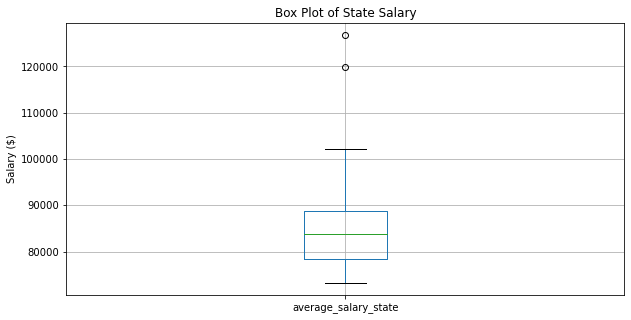

In [260]:
'''
Create a boxplot of the 'average_salary_state' data.
Use boxplot() to create the plot.
'''
final_df.boxplot(column='average_salary_state',figsize=(10,5))
plt.ylabel('Salary ($)')
plt.title('Box Plot of State Salary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

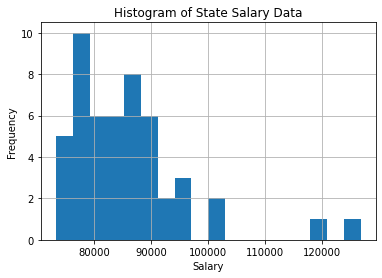

In [261]:
'''
Plot a histogram of the state salary data to visualize the distribution of data in an alternative format.
Use plt.hist() to create the plot.
'''
plt.hist(final_df['average_salary_state'], bins=18)
plt.grid(True) 
plt.title("Histogram of State Salary Data", fontsize=12)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show

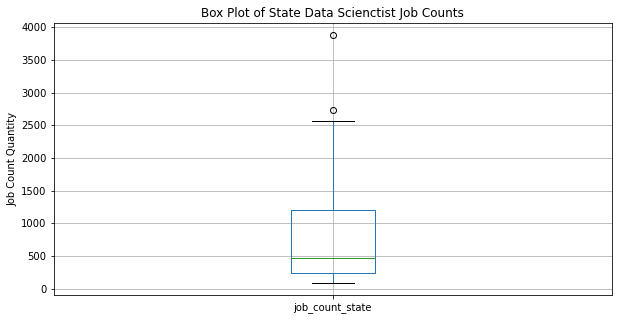

In [262]:
'''
Create a boxplot of 'job_count_state' data.
Use boxplot to create the plot.
'''
final_df.boxplot(column='job_count_state',figsize=(10,5))
plt.ylabel('Job Count Quantity')
plt.title('Box Plot of State Data Scienctist Job Counts')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

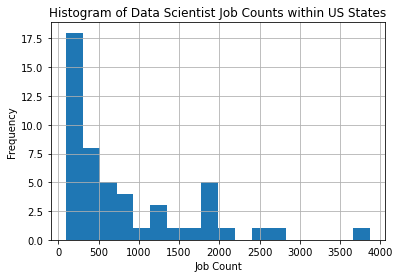

In [263]:
'''
Plot a histogram of the state Data Scientist job counts to visualize the distribution of data in an alternative format.
Use hist() to create the plot.
'''
plt.hist(final_df['job_count_state'], bins=18)
plt.grid(True)
plt.title("Histogram of Data Scientist Job Counts within US States", fontsize=12)
plt.xlabel("Job Count")
plt.ylabel("Frequency")
plt.show

In [264]:
'''
Create a pareto plot function. The basis for this code was found from Tyler Marr's blog and
slightly modified for this application. The site to reference the pareto plot code is:
https://tylermarrs.com/posts/pareto-plot-with-matplotlib/
'''
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)[0:5]
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

C:\Users\jkmey\AppData\Local\Temp/ipykernel_2092/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


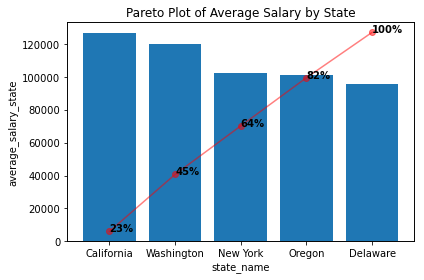

In [268]:
'''
Create a pareto plot of state vs salary. The pareto plot will include only the top 5.
'''
pareto_plot(final_df, x = 'state_name', y = 'average_salary_state', title = 'Pareto Plot of Average Salary by State')

C:\Users\jkmey\AppData\Local\Temp/ipykernel_2092/660345533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


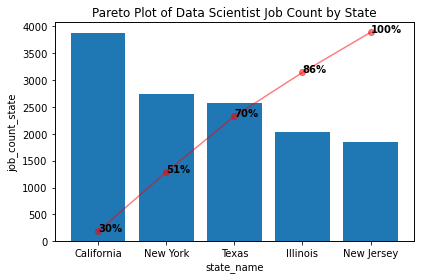

In [267]:
'''
Create a pareto plot of state vs Data Scientist Job Count. The pareto plot will include only the top 5. 
'''
pareto_plot(final_df, x = 'state_name', y = 'job_count_state', title = 'Pareto Plot of Data Scientist Job Count by State')

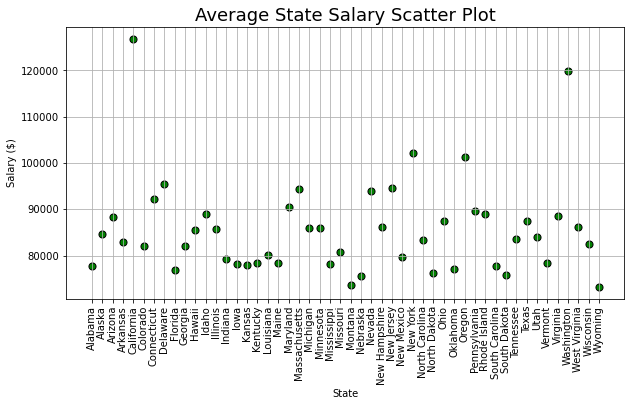

In [270]:
'''
Plot a scatter plot of the state salaries by state.
Use plot() to create the chart.
'''
final_df.plot.scatter('state_name','average_salary_state', s=50, c='green', edgecolor='k', figsize=(10,5))
plt.grid(True)
plt.title("Average State Salary Scatter Plot", fontsize=18)
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.ylabel("Salary ($)")
plt.show()

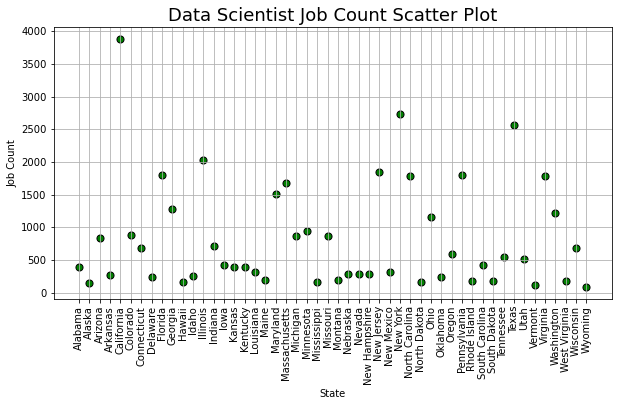

In [272]:
'''
Plot a scatter plot of the Data Scientist job count by state.
Use plot to create the chart.
'''
final_df.plot.scatter('state_name','job_count_state', s=50, c='green', edgecolor='k', figsize=(10,5))
plt.grid(True)
plt.title("Data Scientist Job Count Scatter Plot", fontsize=18)
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.ylabel("Job Count")
plt.show()

In [275]:
'''
Understand the shape of final_df.
'''
print('The shape of the final DataFrame is {} rows and {} columns.'.format(final_df.shape[0],final_df.shape[1]))

The shape of the final DataFrame is 50 rows and 7 columns.


In [274]:
'''
Export final_df to a csv file.
Label the file as Milestone3_final_df.csv
'''
final_df.to_csv('Milestone3_final_df.csv',index=False)

### Milestone 3 Reflection and Ethical Considerations:
This milestone focused on cleaning/formatting website data. The data  was from zippia's website which overviewed Data Scientist job information including salary, job counts, and pay rate. The data was separated into two tables based on city and state. The biggest challenge for this milestone was accessing the content within each data table. First, tried accessing the content through webscraping with BeautifulSoup. The values within each <td> element under the table kept returning empty. Second, tried reading in the content using read_html() from the website. Same situation where the values within the table returned empty. In both situations, I was able to determine there were 12 tables and return the headers from the tables with no issues. However, the content within each row of a table is where the data would not read correctly. As a result, I used the HTML code for both city and state tables and put them into string variables. Those string variables were read with read_html() and put into a list. To get the data into a DataFrame, I used the concatenate function for the city and state tables independently. Once the two tables were structured into DataFrames, the transformation and cleaning methods were executed. All of the transformation and cleaning steps are outlined above within the code. To summarize, both DataFrames were transformed/cleaned independently and then merged together. Some of the transformation/cleaning steps performed were splitting out data within one column into two, stripping white space for strings within a column, dropping repeat columns, rearranging the columns in order, renaming column headers, stripping symbols ($ and ,) out of strings within a column, and casting datatypes to columns. Once each DataFrame was transformed/cleaned appropriately, then they were merged together based on a common index of state abbreviations. Once merged into a final DataFrame (final_df), missing values and outliers were reviewed. The District of Columbia showed an NaN value in the index. The entire row of data for District of Columbia was removed since majority of the row contents were NaN anyways. There were only 17 city values compared to 50 state values within the final DataFrame. As a result, there were 33 missing values that needed to be addressed in three columns: 'city', 'average_salary_city, and 'pay_rate_city'. The 'city' missing values were handled by filling in the NaN entries with "No Data" so these could be sorted/filtered if needed. The 'average_salary_city' and 'pay_rate_city' missing values were handled by filling in the corresponding state average salary and pay rate for the missing entries. Lastly, outliers were reviewed based on distributions of data for 'averate_salary_state' and 'job_count_state' for Data Scientists. One recommendation to improve this project moving forward would be to connect directly to the data source for the tables to pull the desired data. Caution should be taken to ensure annonymity of the data if this route is taken.

Ethical considerations for this project will be discussed in this section. The data collected within this project was directly from zippias website. The data pulled from each table was already summarized without traceability back to the individual data points. The data was collected from zippia's website. As a result, caution should be used not to bog down the traffic for the site with too many requests. The steps taken to transform, clean, and plot the data are outlined above for transperancy. The only data removed from the original set pertained to the District of Columbia information. Majority of the data within this row was missing, so it was removed. The other missing values within the data were addressed by each column. Notes on how each of these were addressed are specified within the code above. The pareto chart function was found from Tyler Marr's blog, so he is the author of the code for that particular section. The pareto function code was slightly modified for the purposes of this project. Lastly, the intent for this project was to derive a clean dataset showing Data Scientist salary information across different states and cities.    